# Cyberbullying Tweet Prediction

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vanne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vanne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load the data
df = pd.read_csv('cyberbullying_tweets.csv')

In [3]:
# Display the first few rows of the data
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
# Display the last few rows of the data
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [5]:
# Check the value counts of 'cyberbullying_type'
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [6]:
#unique categories of classification
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [8]:
df.describe

<bound method NDFrame.describe of                                               tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]>

In [9]:
# Check for missing values
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [10]:
# Check for duplicated rows
df.duplicated().sum()

36

In [11]:
# Printing duplicated rows
df[df.duplicated(keep=False)]

,tweet_text,cyberbullying_type
829,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
1712,This is the opportunity to prove ourselves lik...,not_cyberbullying
1758,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
1984,@TVWEEKmag: There is only 1 way to stay in the...,not_cyberbullying
2611,It wouldn't be fair. Kat knows NOTHING of fair...,not_cyberbullying
...,...,...
20604,A Pakistani court has sentenced 86 members of ...,religion
41403,"Still, Davis, who is gay, said he pays a socia...",ethnicity
46915,Racism won't stop as long as u stil select ur ...,ethnicity
46962,"Still, Davis, who is gay, said he pays a socia...",ethnicity


In [12]:
#Dropping duplicated rows
df.drop_duplicates(keep='first', inplace=True)

In [13]:
#Reverifying if duplicated rows exist
df.duplicated().sum()

0

In [14]:
#checking for existance of empty strings
df['tweet_text'].str.strip().str.len().eq(0).any()

False

In [15]:
# Initialize WordNetLemmatizer and stopwords
lemma = WordNetLemmatizer()
STOPWORDS = set(stopwords.words('english'))
# Update stopwords with additional common words
STOPWORDS.update([ 'the', 'a', 'an','of','im', 'wa', 'p', 't', 's', 'o', 'e', 'like','and'])

def clean_text(text):
    # Remove Hashtag, Mention, URLs, and other patterns
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    
    # Make all text lowercase
    text = text.lower()
    
    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Lemmatize words
    text = " ".join([lemma.lemmatize(word) for word in word_tokenize(text)])
    
    # Remove Punctuation
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)
    
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in STOPWORDS])
    
    return text

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vanne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

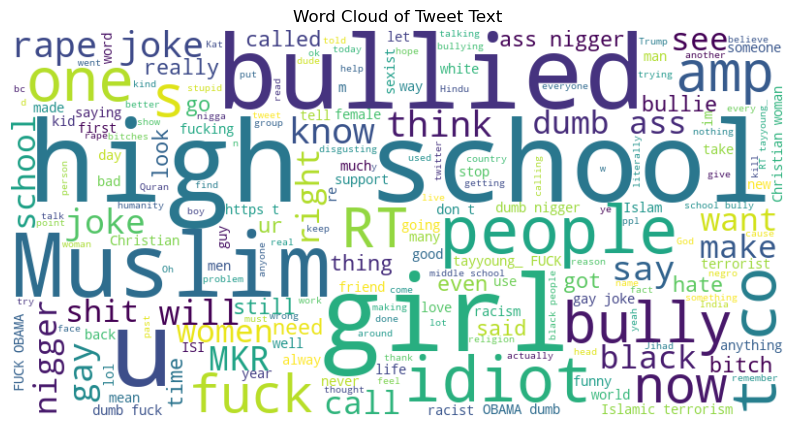

In [17]:
from wordcloud import WordCloud

# Combine all tweet text into a single string
text_combined = ' '.join(df['tweet_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweet Text')
plt.axis('off')
plt.show()


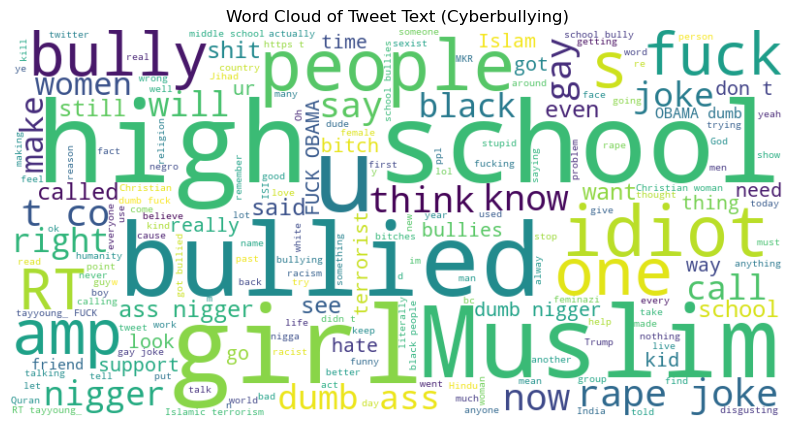

In [18]:

# Filter the DataFrame for cyberbullying_type not equal to 'not_cyberbullying'
filtered_df = df[df['cyberbullying_type'] != 'not_cyberbullying']

# Combine all tweet text into a single string
text_combined = ' '.join(filtered_df['tweet_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweet Text (Cyberbullying)')
plt.axis('off')
plt.show()

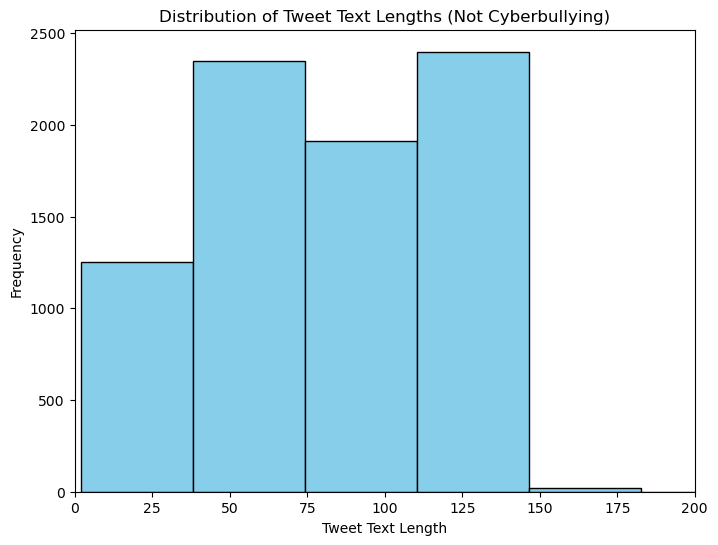

In [19]:
# Calculate the length of tweet text for rows where cyberbullying_type is 'not_cyberbullying'
not_cyberbullying_length = df[df['cyberbullying_type'] == 'not_cyberbullying']['tweet_text'].apply(len)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(not_cyberbullying_length, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Text Lengths (Not Cyberbullying)')
plt.xlabel('Tweet Text Length')
plt.ylabel('Frequency')


# Set the x-axis range
plt.xlim(0, 200)

plt.show()


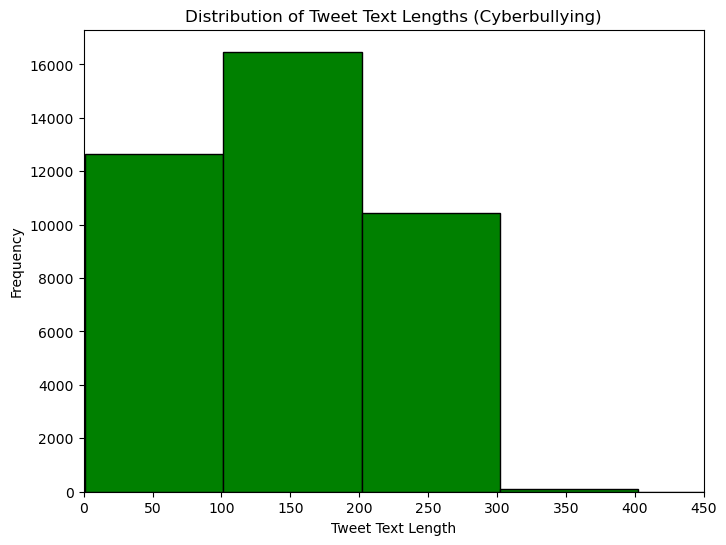

In [20]:
# Filter the DataFrame for rows where cyberbullying_type is not equal to 'not_cyberbullying'
cyberbullying_length = df[df['cyberbullying_type'] != 'not_cyberbullying']['tweet_text'].apply(len)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(cyberbullying_length, bins=50, color='green', edgecolor='black')
plt.title('Distribution of Tweet Text Lengths (Cyberbullying)')
plt.xlabel('Tweet Text Length')
plt.ylabel('Frequency')

# Set the x-axis range
plt.xlim(0, 450)

plt.show()


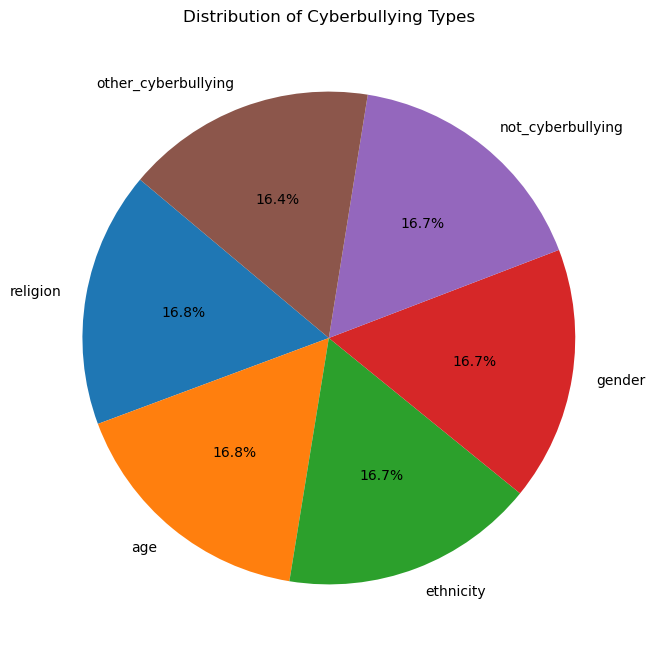

In [21]:
plt.figure(figsize=(8, 8))
df['cyberbullying_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cyberbullying Types')
plt.ylabel('')
plt.show()


In [22]:
# Encoding the target variable
ENCODE_DICT = {'not_cyberbullying': 0,
               'gender': 1,
               'religion': 2,
               'other_cyberbullying': 3,
               'age': 4,
               'ethnicity': 5}
df['cyberbullying_type'] = df.cyberbullying_type.replace(ENCODE_DICT)

In [23]:
# Checking for unique encoded categories
df.cyberbullying_type.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [24]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


In [25]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",5
47688,Turner did not withhold his disappointment. Tu...,5
47689,I swear to God. This dumb nigger bitch. I have...,5
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,5
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,5


In [26]:
# Apply clean_text function to preprocess tweet text
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

In [27]:
# Create word vector (count)
CountVector = CountVectorizer(max_features=2000)

In [28]:
# Transform cleaned tweet text into word count vectors
X = CountVector.fit_transform(df['cleaned_text']).toarray()

In [29]:
# Target variable
y = df['cyberbullying_type'].values

In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet_text'], df['cyberbullying_type'], test_size=0.2, random_state=42)

In [32]:
X_train_vectorized = CountVector.fit_transform(X_train)
X_test_vectorized = CountVector.transform(X_test)

In [33]:
X_train_vectorized.shape

(38124, 2000)

In [34]:
X_test_vectorized.shape

(9532, 2000)

In [35]:
X_train.shape

(38124,)

In [36]:
y_train.shape 

(38124,)

## 1. Passive aggresive classifier

In [43]:

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

In [44]:
pa_classifier = PassiveAggressiveClassifier(max_iter=1000)

In [48]:
batch_size = len(X_train) // 3  

In [50]:
batch_size

12708

In [49]:

# Incremental Training - Batch 1
X_batch = X_train_vectorized[:batch_size]
y_batch = y_train[:batch_size]
pa_classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

PassiveAggressiveClassifier()

In [51]:
# Incremental Training - Batch 2
X_batch = X_train_vectorized[batch_size:2*batch_size]
y_batch = y_train[batch_size:2*batch_size]
pa_classifier.partial_fit(X_batch, y_batch)

PassiveAggressiveClassifier()

In [52]:
# Incremental Training - Batch 3 and Evaluation
X_batch = X_train_vectorized[2*batch_size:]
y_batch = y_train[2*batch_size:]
pa_classifier.partial_fit(X_batch, y_batch)

PassiveAggressiveClassifier()

In [53]:
# Predict labels for the test data
y_pred_pa = pa_classifier.predict(X_test_vectorized)

In [78]:
pa_classifier_accuracy=accuracy_score(y_test, y_pred_pa)
pa_classifier_accuracy

0.7834662190516156

## 2. XGBoost

In [51]:
%pip install xgboost

   ---------------------------------------- 99.8/99.8 MB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [56]:
xgb_classifier = xgb.XGBClassifier()

In [57]:
# Train the classifier on the entire training data
xgb_classifier.fit(X_train_vectorized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:

# Predict labels for the test data
y_pred_xgb = xgb_classifier.predict(X_test_vectorized)


In [79]:
xgb_classifier_accuracy=accuracy_score(y_test, y_pred_xgb)
xgb_classifier_accuracy

0.8398027696181284

In [41]:
#exporting the predictions

In [57]:
# Create a DataFrame to merge the original text with predictions and true labels
results_df = pd.DataFrame({
    'tweet': X_test.reset_index(drop=True),
    'y_pred': y_pred_xgb,
    'y_true': y_test.reset_index(drop=True)
})


In [86]:
results_df

,tweet,y_pred,y_true
0,Yup there still hot blondes #mkr,0,1
1,"alissa violet rlly said ""it's everyday bro w t...",4,4
2,Ever get #bullied for being fat? Porky gets he...,0,0
3,@FarooqSumar @NafeezAhmed @MaxBlumenthal Wrong...,2,2
4,"RT @thetrudz: And, it is comical for Emma to m...",1,1
...,...,...,...
9527,"The strategy is working! Tonight, channel7 are...",0,0
9528,in high school i was always called ugly and wa...,4,4
9529,Lashkar’s #Rohingya outreach: Making terrorist...,2,2
9530,“@felicia_Shahan: A nigger doesn't even mean a...,5,5


In [59]:
results_df.to_csv('test_predictions.csv', index=False)

In [60]:
#new text

In [60]:
#row 21 from test_predictions.csv
new_text = ["This SecState has become a joke. He speaks like a middle school yard bully."]

In [61]:
cleaned_new_text = [clean_text(text) for text in new_text]

In [63]:
# Transform the new input text using the fitted CountVectorizer
new_text_vectorized = X_test_vectorized.transform(cleaned_new_text)

In [64]:
xgb_classifier.predict(new_text_vectorized)

array([4], dtype=int64)

In [65]:
#ENCODE_DICT = {'not_cyberbullying': 0,
  #             'gender': 1,
   #            'religion': 2,
    #           'other_cyberbullying': 3,
     #          'age': 4,
      #         'ethnicity': 5}


 ## 3. Random forest

In [66]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [67]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

In [68]:
# Train the classifier on the entire training data
rf_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [69]:
y_pred_rf = rf_classifier.predict(X_test_vectorized)

In [80]:
rf_classifier_accuracy=accuracy_score(y_test, y_pred_rf)
rf_classifier_accuracy

0.8159882501049098

## 4. Multinomial Naive Bayes

In [71]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
    

In [72]:

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(df['tweet_text'])


In [73]:
# Split the data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_tfidf, df['cyberbullying_type'], test_size=0.2, random_state=42)

# Define the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()


In [74]:

# Train the classifier
nb_classifier.fit(X_train_nb, y_train_nb)


MultinomialNB()

In [75]:

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test_nb)

In [82]:
nb_classifier_accuracy=accuracy_score(y_test_nb, y_pred_nb)
nb_classifier_accuracy

0.7675199328577423

## Models Comparison 

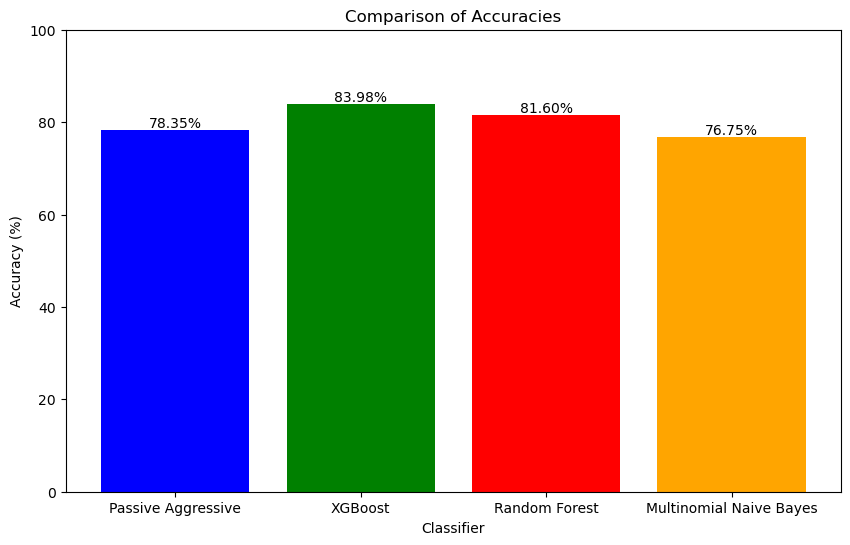

In [86]:
# Convert accuracies to percentage
pa_classifier_accuracy_percentage = pa_classifier_accuracy * 100
xgb_classifier_accuracy_percentage = xgb_classifier_accuracy * 100
rf_classifier_accuracy_percentage = rf_classifier_accuracy * 100
nb_classifier_accuracy_percentage = nb_classifier_accuracy * 100

# Classifier names
classifiers = ['Passive Aggressive', 'XGBoost', 'Random Forest', 'Multinomial Naive Bayes']

# Classifier accuracies
accuracies = [pa_classifier_accuracy_percentage, 
              xgb_classifier_accuracy_percentage, 
              rf_classifier_accuracy_percentage, 
              nb_classifier_accuracy_percentage]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')

# Adding the percentage labels
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.5, f'{accuracies[i]:.2f}%', ha='center')

plt.ylim(0, 100)  # Setting y-axis limit to 100 for better visualization

plt.show()


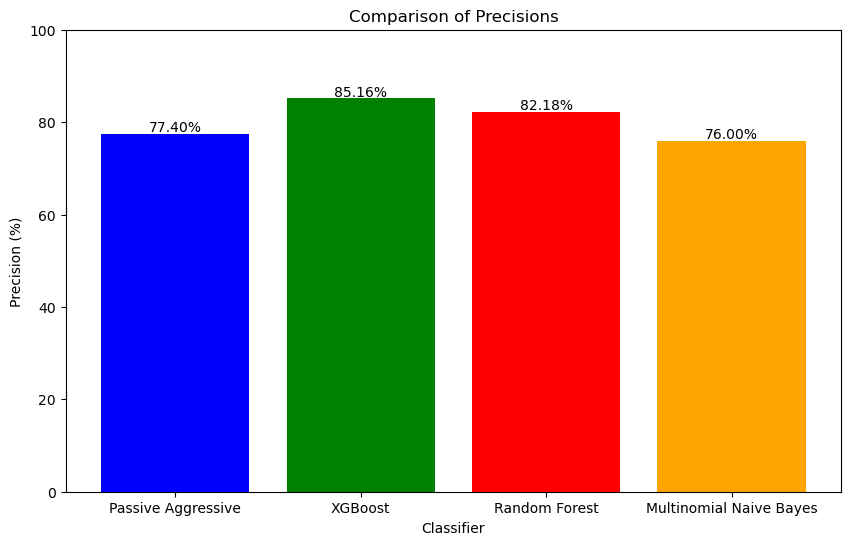

In [87]:
from sklearn.metrics import precision_score

# Calculate precision for each model
pa_precision = precision_score(y_test, y_pred_pa, average=None)
xgb_precision = precision_score(y_test, y_pred_xgb, average=None)
rf_precision = precision_score(y_test, y_pred_rf, average=None)
nb_precision = precision_score(y_test, y_pred_nb, average=None)

# Convert precision to percentage
pa_precision_percentage = pa_precision * 100
xgb_precision_percentage = xgb_precision * 100
rf_precision_percentage = rf_precision * 100
nb_precision_percentage = nb_precision * 100

# Classifier names
classifiers = ['Passive Aggressive', 'XGBoost', 'Random Forest', 'Multinomial Naive Bayes']

# Precision scores
precisions = [pa_precision_percentage.mean(), 
              xgb_precision_percentage.mean(), 
              rf_precision_percentage.mean(), 
              nb_precision_percentage.mean()]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers, precisions, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of Precisions')
plt.xlabel('Classifier')
plt.ylabel('Precision (%)')

# Adding the percentage labels
for i in range(len(precisions)):
    plt.text(i, precisions[i] + 0.5, f'{precisions[i]:.2f}%', ha='center')

plt.ylim(0, 100)  # Setting y-axis limit to 100 for better visualization

plt.show()


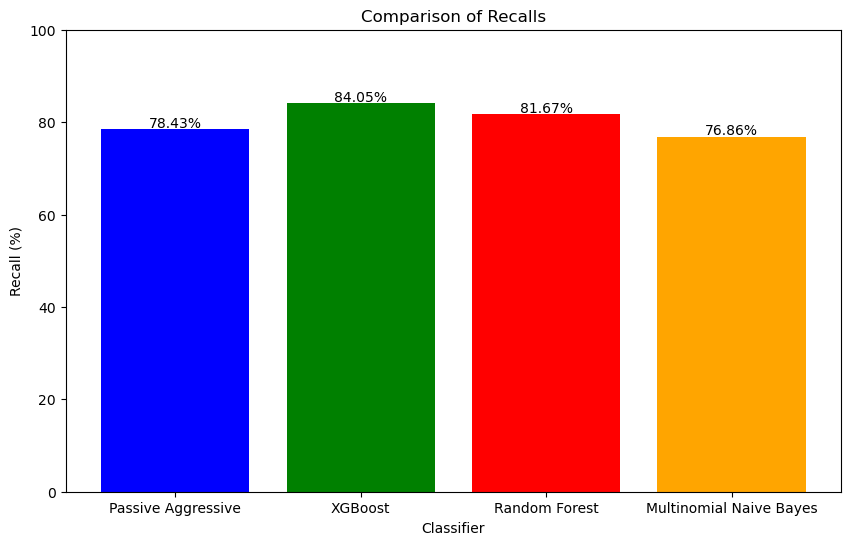

In [88]:
from sklearn.metrics import recall_score

# Calculate recall for each model
pa_recall = recall_score(y_test, y_pred_pa, average=None)
xgb_recall = recall_score(y_test, y_pred_xgb, average=None)
rf_recall = recall_score(y_test, y_pred_rf, average=None)
nb_recall = recall_score(y_test, y_pred_nb, average=None)

# Convert recall to percentage
pa_recall_percentage = pa_recall * 100
xgb_recall_percentage = xgb_recall * 100
rf_recall_percentage = rf_recall * 100
nb_recall_percentage = nb_recall * 100

# Classifier names
classifiers = ['Passive Aggressive', 'XGBoost', 'Random Forest', 'Multinomial Naive Bayes']

# Recall scores
recalls = [pa_recall_percentage.mean(), 
           xgb_recall_percentage.mean(), 
           rf_recall_percentage.mean(), 
           nb_recall_percentage.mean()]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers, recalls, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of Recalls')
plt.xlabel('Classifier')
plt.ylabel('Recall (%)')

# Adding the percentage labels
for i in range(len(recalls)):
    plt.text(i, recalls[i] + 0.5, f'{recalls[i]:.2f}%', ha='center')

plt.ylim(0, 100)  # Setting y-axis limit to 100 for better visualization

plt.show()


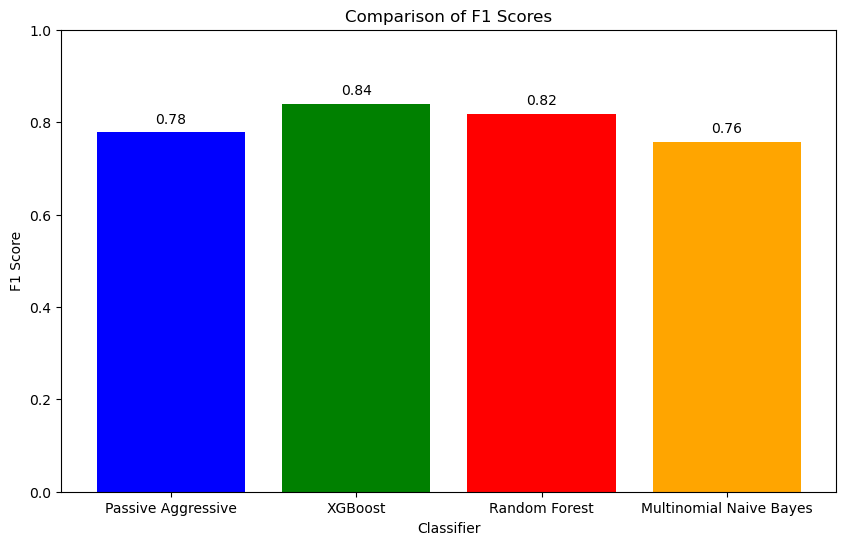

In [89]:
from sklearn.metrics import f1_score

# Calculate F1 score for each model
pa_f1 = f1_score(y_test, y_pred_pa, average=None)
xgb_f1 = f1_score(y_test, y_pred_xgb, average=None)
rf_f1 = f1_score(y_test, y_pred_rf, average=None)
nb_f1 = f1_score(y_test, y_pred_nb, average=None)

# Classifier names
classifiers = ['Passive Aggressive', 'XGBoost', 'Random Forest', 'Multinomial Naive Bayes']

# F1 scores
f1_scores = [pa_f1.mean(), 
             xgb_f1.mean(), 
             rf_f1.mean(), 
             nb_f1.mean()]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_scores, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of F1 Scores')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')

# Adding the F1 score labels
for i in range(len(f1_scores)):
    plt.text(i, f1_scores[i] + 0.02, f'{f1_scores[i]:.2f}', ha='center')

plt.ylim(0, 1)  # Setting y-axis limit between 0 and 1 for better visualization

plt.show()


In [93]:
# Function to plot confusion matrix
from sklearn.metrics import confusion_matrix

# Function to print confusion matrix as array
def print_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f'Confusion Matrix - {classifier_name}:')
    print(cm)

# Print confusion matrix for each classifier
print_confusion_matrix(y_test, y_pred_pa, 'Passive Aggressive')
print()
print_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
print()
print_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
print()
print_confusion_matrix(y_test, y_pred_nb, 'Multinomial Naive Bayes')



Confusion Matrix - Passive Aggressive:
[[ 842  151  118  399   93   21]
 [ 104 1262   26  105   10    7]
 [  40   11 1487   19    3    2]
 [ 571  139   52  750   51   31]
 [  27    6    1   15 1552    1]
 [  13   12   12   20    4 1575]]

Confusion Matrix - XGBoost:
[[ 770   59   46  739   10    0]
 [ 117 1258    1  134    2    2]
 [  44    5 1481   31    1    0]
 [ 208   53    1 1321    6    5]
 [  22    1    0   19 1558    2]
 [   9    0    0   10    0 1617]]

Confusion Matrix - Random Forest:
[[ 793   61   52  678   36    4]
 [ 115 1249    4  140    5    1]
 [  38    7 1482   31    1    3]
 [ 430   69    8 1066   14    7]
 [  10    1    1   13 1577    0]
 [   3    3    0   17    2 1611]]

Confusion Matrix - Multinomial Naive Bayes:
[[ 711   87  191  416  178   41]
 [ 132 1193   37   93   25   34]
 [  33   15 1482   16   12    4]
 [ 201  102  124  926  175   66]
 [  22    5    9   18 1541    7]
 [  13   14   51   52   43 1463]]


### It is observed that the XG Boost Model performs better in comparison to others

### Exporting the XG Boost Classifier 

In [97]:
import pickle
pickle_out = open("xgb_model.pkl","wb")
pickle.dump(xgb_classifier,pickle_out)
pickle_out.close()

In [102]:
pickle_out = open("count_vectorizer.pkl","wb")
pickle.dump(CountVector,pickle_out)
pickle_out.close()